In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import f1_score
import numpy as np

In [27]:
negs = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/NegativeProb.csv')
pos = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/PosProb.csv')

In [28]:
negs['Label'] = 0
pos['Label'] = 1
negs['Predicted'] = 1-negs['Predicted_negative']

In [29]:
y = pd.concat([negs,pos])
y = y.drop(['Predicted_negative'],axis=1)

# Plot the two distributions

<Axes: xlabel='Predicted', ylabel='Percent'>

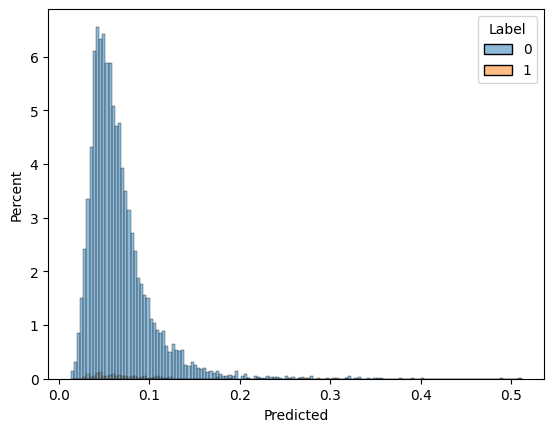

In [30]:
sns.histplot(y,x = 'Predicted',hue='Label',stat="percent")

In [7]:
y.groupby('Label').mean()

,Predicted
Label,
0,0.439744
1,0.448896


# Look at the precission recall curve

In [31]:
precision, recall, thresholds= precision_recall_curve(y['Label'],y['Predicted'])

<Axes: >

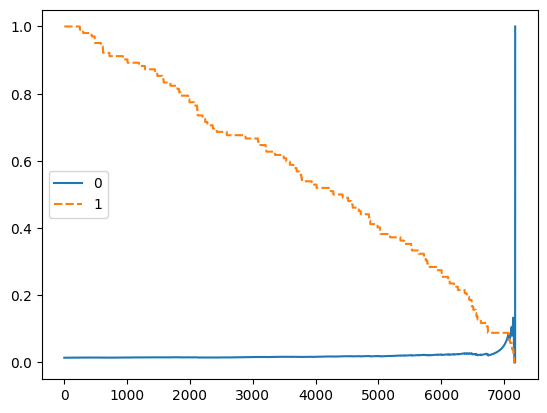

In [32]:
sns.lineplot([precision,recall])

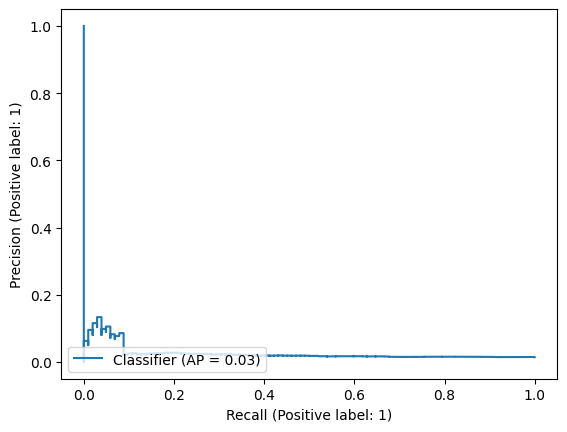

In [33]:
PrecisionRecallDisplay.from_predictions(y['Label'],y['Predicted'])

In [34]:
def find_optimal_threshold(precisions, recalls, thresholds):
    """
    Given a list of precisions, recalls, and corresponding thresholds, finds the optimal threshold
    that maximizes the F1 score (harmonic mean of precision and recall).

    Args:
    - precisions (list): A list of precisions.
    - recalls (list): A list of recalls.
    - thresholds (list): A list of thresholds corresponding to the precisions and recalls.

    Returns:
    - The optimal threshold (float).
    """

    # Calculate F1 scores for each threshold
    f1_scores = [2 * (p * r) / (p + r) if p + r > 0 else 0 for p, r in zip(precisions, recalls)]

    # Find the index of the threshold with the highest F1 score
    max_index = f1_scores.index(max(f1_scores))

    # Return the corresponding threshold
    return thresholds[max_index],f1_scores[max_index]

In [35]:
def confusion_matrix(predictions, labels, threshold):
    """
    Given a list of binary predictions and labels, and a threshold value, calculates and returns the confusion matrix.

    Args:
    - predictions (list): A list of binary predictions (0 or 1).
    - labels (list): A list of binary labels (0 or 1).
    - threshold (float): The decision threshold for the predictions.

    Returns:
    - The confusion matrix as a dictionary with keys 'true_positive', 'false_positive', 'true_negative', 'false_negative'.
    """

    # Initialize the counts to zero
    true_positive = 0
    false_positive = 0
    true_negative = 0
    false_negative = 0

    # Iterate over each prediction and label
    for pred, label in zip(predictions, labels):
        if pred >= threshold:
            if label == 1:
                true_positive += 1
            else:
                false_positive += 1
        else:
            if label == 0:
                true_negative += 1
            else:
                false_negative += 1

    # Return the confusion matrix as a dictionary
    return {
        'true_positive': true_positive,
        'false_positive': false_positive,
        'true_negative': true_negative,
        'false_negative': false_negative
    }

In [36]:
find_optimal_threshold(precision, recall, thresholds)

(0.1756974011659622, 0.08695652173913045)

In [13]:
len(precision),len(recall),len(thresholds)

(7192, 7192, 7191)

In [44]:
confusion_matrix(y['Predicted'],y['Label'],0.1756974011659622)

{'true_positive': 9,
 'false_positive': 96,
 'true_negative': 7013,
 'false_negative': 93}

In [45]:
from torchvision import transforms

In [47]:
transforms.RandomResizedCrop.__name__

'RandomResizedCrop'